In [1]:
%load_ext lab_black

In [2]:
import warnings

import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
with warnings.catch_warnings(record=True):
    warnings.simplefilter("always")
    one_month_inflation = pd.read_excel("../data/inflation_1_month.xlsx", header=11)
    two_month_inflation = pd.read_excel("../data/inflation_2_month.xlsx", header=11)
    three_month_inflation = pd.read_excel("../data/inflation_3_month.xlsx", header=11)
    six_month_inflation = pd.read_excel("../data/inflation_6_month.xlsx", header=11)
    twelve_month_inflation = pd.read_excel("../data/inflation_12_month.xlsx", header=11)

In [4]:
months = [
    "Jan",
    "Feb",
    "Mar",
    "Apr",
    "May",
    "Jun",
    "Jul",
    "Aug",
    "Sep",
    "Oct",
    "Nov",
    "Dec",
]


def format_inflation_table(table, months, scale):
    inflation_formatted = []
    for idx, row in table.iterrows():
        year = int(row["Year"])
        for n, month in enumerate(months):
            inflation_formatted.append([f"{year}-{n + 1}-01", row[month]])

    formatted = pd.DataFrame(
        inflation_formatted, columns=["date", f"inflation_{scale}"]
    )

    formatted["date"] = pd.to_datetime(formatted["date"])

    formatted = formatted.set_index("date")

    return formatted


inflation_table = pd.concat(
    [
        eval(f"format_inflation_table({scale}_inflation, months, '{scale}')")
        for scale in [
            "one_month",
            "two_month",
            "three_month",
            "six_month",
            "twelve_month",
        ]
    ],
    axis=1,
    join="inner",
)

In [5]:
inflation_table

,inflation_one_month,inflation_two_month,inflation_three_month,inflation_six_month,inflation_twelve_month
date,,,,,
1990-01-01,0.4,0.5,0.8,2.3,4.4
1990-02-01,0.6,1.0,1.1,2.7,4.6
1990-03-01,0.8,1.4,1.8,3.0,4.9
1990-04-01,0.2,1.1,1.7,2.5,4.8
1990-05-01,0.1,0.4,1.2,2.4,4.8
...,...,...,...,...,...
2022-08-01,0.5,0.8,1.6,3.2,6.3
2022-09-01,0.4,0.9,1.3,3.2,6.6
2022-10-01,0.3,0.7,1.2,2.9,6.3


In [6]:
opec_price = pd.read_xml("../data/opec_basket_prices.xml", names=["date", "opec_price"])
opec_price["date"] = pd.to_datetime(opec_price["date"])
opec_price = opec_price.set_index("date")

brent_price = pd.read_csv("../data/brent_price.csv", header=4)
brent_price["date"] = pd.to_datetime(brent_price["Week of"])
brent_price = brent_price.drop(columns=["Week of"])
brent_price = brent_price.rename(
    columns={"Weekly Europe Brent Spot Price FOB Dollars per Barrel": "brent_price"}
)
brent_price = brent_price.set_index("date")

brent_price = pd.read_csv("../data/brent_price.csv", header=4)
brent_price["date"] = pd.to_datetime(brent_price["Week of"])
brent_price = brent_price.drop(columns=["Week of"])
brent_price = brent_price.rename(
    columns={"Weekly Europe Brent Spot Price FOB Dollars per Barrel": "brent_price"}
)
brent_price = brent_price.set_index("date")

wti_price = pd.read_csv("../data/wti_price.csv", header=4)
wti_price["date"] = pd.to_datetime(wti_price["Week of"])
wti_price = wti_price.drop(columns=["Week of"])
wti_price = wti_price.rename(
    columns={"Weekly Cushing OK WTI Spot Price FOB Dollars per Barrel": "wti_price"}
)
wti_price = wti_price.set_index("date")

wti_price

,wti_price
date,
2023-01-13,77.10
2023-01-06,74.27
2022-12-30,79.23
2022-12-23,77.28
2022-12-16,75.12
...,...
1986-01-31,19.69
1986-01-24,20.31
1986-01-17,24.57


In [7]:
gas_price = pd.read_csv("../data/gas_prices.csv", header=4)
gas_price["date"] = pd.to_datetime(gas_price["Week of"])
gas_price = gas_price.drop(columns=["Week of"])
gas_price = gas_price.rename(
    columns={
        "Weekly U.S. All Grades All Formulations Retail Gasoline Prices Dollars per Gallon": "gas_price"
    }
)
gas_price = gas_price.set_index("date")
gas_price

,gas_price
date,
2023-01-16,3.416
2023-01-09,3.366
2023-01-02,3.331
2022-12-26,3.203
2022-12-19,3.234
...,...
1993-05-03,1.086
1993-04-26,1.086
1993-04-19,1.079


In [8]:
proved_reserves = pd.read_csv("../data/oil-proved-reserves.csv")
proved_reserves = (
    pd.pivot_table(
        proved_reserves,
        values=["Oil - Proved reserves"],
        index=["Year"],
        columns=["Entity"],
    )
    .reset_index()["Oil - Proved reserves"]
    .reset_index()
)

proved_reserves["date"] = pd.to_datetime(
    (proved_reserves["index"] + 1982).astype(str) + "-01-01"
)
proved_reserves = (
    proved_reserves.set_index("date").dropna(axis=1).drop(columns=["index"])
)

In [9]:
full_dates = sorted(
    [
        date + pd.to_timedelta(d * 60 * 60 * 1e9 * 24)
        for d in range(365)
        for date in proved_reserves.index
    ]
)
num_days = [d for _ in range(len(proved_reserves)) for d in range(365)]
for_oil_calc = pd.DataFrame({"date": full_dates, "num_days": num_days}).set_index(
    "date"
)

assumed_rate = proved_reserves.diff() / 365.0

country_rates = pd.concat([for_oil_calc, assumed_rate], join="outer", axis=1).ffill()
delta = country_rates.multiply(country_rates["num_days"], axis=0)

assumed_reserves = (
    pd.concat([for_oil_calc, proved_reserves], join="outer", axis=1).ffill() + delta
).drop(columns=["num_days"])

assumed_reserves = assumed_reserves.rename(
    columns={col: f"oil_reserves_{col}" for col in assumed_reserves.columns}
)
assumed_reserves

,oil_reserves_Africa,oil_reserves_Africa (BP),oil_reserves_Algeria,oil_reserves_Angola,oil_reserves_Argentina,oil_reserves_Asia,oil_reserves_Asia Pacific (BP),oil_reserves_Australia,oil_reserves_Brazil,oil_reserves_Brunei,...,oil_reserves_Trinidad and Tobago,oil_reserves_Tunisia,oil_reserves_United Arab Emirates,oil_reserves_United Kingdom,oil_reserves_United States,oil_reserves_Upper-middle-income countries,oil_reserves_Venezuela,oil_reserves_Vietnam,oil_reserves_World,oil_reserves_Yemen
date,,,,,,,,,,,,,,,,,,,,,
1982-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,1.707658e+10,1.707658e+10,1.664080e+09,1.061601e+09,338641303.0,1.250652e+11,6.134061e+09,326042648.8,1.520347e+09,150040000.0,...,33142744.8,57970000.0,1.333992e+10,341000000.0,9.378455e+09,5.390967e+10,4.143911e+10,600160000.0,2.359659e+11,409200000.0
2022-12-28,1.707661e+10,1.707661e+10,1.664080e+09,1.061601e+09,338641303.0,1.250651e+11,6.133990e+09,326042648.8,1.520052e+09,150040000.0,...,33142744.8,57970000.0,1.333992e+10,341000000.0,9.378455e+09,5.390938e+10,4.143911e+10,600160000.0,2.359650e+11,409200000.0
2022-12-29,1.707664e+10,1.707664e+10,1.664080e+09,1.061601e+09,338641303.0,1.250651e+11,6.133919e+09,326042648.8,1.519757e+09,150040000.0,...,33142744.8,57970000.0,1.333992e+10,341000000.0,9.378455e+09,5.390909e+10,4.143911e+10,600160000.0,2.359641e+11,409200000.0


In [10]:
table = pd.concat(
    [inflation_table, opec_price, brent_price, wti_price, assumed_reserves, gas_price],
    axis=1,
    join="outer",
)
table = table.sort_values("date")
table = table.ffill()

per_week_grouper = pd.Grouper(key="date", freq="W-MON")
table = table.reset_index()
table = table.groupby(per_week_grouper).first()
table = table[~table["gas_price"].isna()]

In [11]:
def format_column_name(name):
    name = name.lower()
    name = name.replace(" ", "_")
    name = name.replace("-", "_")
    name = name.replace("(", "").replace(")", "")
    return name


table = table.rename(columns={col: format_column_name(col) for col in table.columns})

In [12]:
table["opec_price"] = table["opec_price"].fillna(
    table[["brent_price", "wti_price"]].mean(axis=1)
)
table

,inflation_one_month,inflation_two_month,inflation_three_month,inflation_six_month,inflation_twelve_month,opec_price,brent_price,wti_price,oil_reserves_africa,oil_reserves_africa_bp,...,oil_reserves_tunisia,oil_reserves_united_arab_emirates,oil_reserves_united_kingdom,oil_reserves_united_states,oil_reserves_upper_middle_income_countries,oil_reserves_venezuela,oil_reserves_vietnam,oil_reserves_world,oil_reserves_yemen,gas_price
date,,,,,,,,,,,,,,,,,,,,,
1993-04-05,0.4,1.0,1.5,2.2,3.4,19.210,18.42,20.00,8.288873e+09,8.288874e+09,...,1.062414e+07,1.338084e+10,5.726978e+08,4.329006e+09,4.374194e+10,8.630661e+09,3.402676e+07,1.487027e+11,2.744929e+08,1.068
1993-04-12,0.2,0.6,1.2,1.8,3.5,19.585,18.73,20.44,8.293179e+09,8.293180e+09,...,7.123817e+06,1.338084e+10,5.730902e+08,4.324575e+09,4.391546e+10,8.637450e+09,3.412943e+07,1.488909e+11,2.745190e+08,1.068
1993-04-19,0.2,0.6,1.2,1.8,3.5,19.540,18.71,20.37,8.297486e+09,8.297486e+09,...,3.623494e+06,1.338084e+10,5.734826e+08,4.320144e+09,4.408898e+10,8.644238e+09,3.423210e+07,1.490791e+11,2.745452e+08,1.079
1993-04-26,0.2,0.6,1.2,1.8,3.5,19.475,18.67,20.28,8.301792e+09,8.301792e+09,...,1.231711e+05,1.338084e+10,5.738750e+08,4.315712e+09,4.426250e+10,8.651026e+09,3.433478e+07,1.492673e+11,2.745713e+08,1.079
1993-05-03,0.2,0.6,1.2,1.8,3.5,19.255,18.56,19.95,8.306098e+09,8.306099e+09,...,-3.377152e+06,1.338084e+10,5.742674e+08,4.311281e+09,4.443602e+10,8.657814e+09,3.443745e+07,1.494555e+11,2.745975e+08,1.086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,0.2,0.3,0.6,1.8,5.7,78.130,80.80,75.12,1.707636e+10,1.707636e+10,...,5.797000e+07,1.333992e+10,3.410000e+08,9.378455e+09,5.391168e+10,4.143911e+10,6.001600e+08,2.359723e+11,4.092000e+08,3.234
2023-01-02,0.2,0.3,0.6,1.8,5.7,82.230,80.68,77.28,1.707658e+10,1.707658e+10,...,5.797000e+07,1.333992e+10,3.410000e+08,9.378455e+09,5.390967e+10,4.143911e+10,6.001600e+08,2.359659e+11,4.092000e+08,3.203
2023-01-09,0.2,0.3,0.6,1.8,5.7,82.050,81.83,79.23,1.707670e+10,1.707671e+10,...,5.797000e+07,1.333992e+10,3.410000e+08,9.378455e+09,5.390852e+10,4.143911e+10,6.001600e+08,2.359623e+11,4.092000e+08,3.331


In [13]:
table[table.isna().any(axis=1)]

,inflation_one_month,inflation_two_month,inflation_three_month,inflation_six_month,inflation_twelve_month,opec_price,brent_price,wti_price,oil_reserves_africa,oil_reserves_africa_bp,...,oil_reserves_tunisia,oil_reserves_united_arab_emirates,oil_reserves_united_kingdom,oil_reserves_united_states,oil_reserves_upper_middle_income_countries,oil_reserves_venezuela,oil_reserves_vietnam,oil_reserves_world,oil_reserves_yemen,gas_price
date,,,,,,,,,,,,,,,,,,,,,


0.9780956302426083

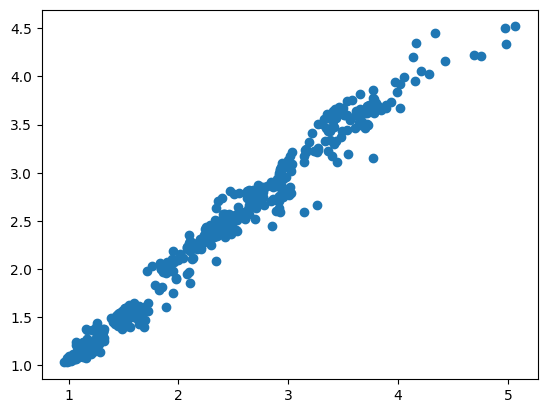

In [14]:
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

target = "gas_price"
features = [col for col in table.columns if col != target]

X, y = table[features], table[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lr = Lasso(alpha=0.01)
model = lr.fit(X_train, y_train)

y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
model.score(X_test, y_test)

In [15]:
sorter = np.argsort(model.coef_)
for i in sorter:
    print(features[i], model.coef_[i])

oil_reserves_indonesia -0.01635136847743114
inflation_one_month -0.0
oil_reserves_iraq 0.0
oil_reserves_world 0.0
oil_reserves_low_income_countries 0.0
oil_reserves_malaysia 0.0
oil_reserves_mexico -0.0
oil_reserves_non_oecd_bp 0.0
oil_reserves_north_america 0.0
oil_reserves_north_america_bp 0.0
oil_reserves_norway -0.0
oil_reserves_oecd_bp 0.0
oil_reserves_oceania -0.0
oil_reserves_oman 0.0
oil_reserves_peru 0.0
oil_reserves_qatar 0.0
oil_reserves_south_america 0.0
oil_reserves_south_and_central_america_bp 0.0
oil_reserves_sudan -0.0
oil_reserves_syria 0.0
oil_reserves_thailand 0.0
oil_reserves_total_non_opec_bp 0.0
oil_reserves_trinidad_and_tobago 0.0
oil_reserves_tunisia 0.0
oil_reserves_united_arab_emirates -0.0
oil_reserves_united_kingdom -0.0
oil_reserves_united_states 0.0
oil_reserves_upper_middle_income_countries 0.0
oil_reserves_venezuela 0.0
oil_reserves_romania -0.0
oil_reserves_india -0.0
oil_reserves_italy -0.0
oil_reserves_gabon -0.0
inflation_two_month -0.0
inflation_thr

In [16]:
# opec price has a coeffiecient of zero because we filled missing values with the mean of brent and wti
to_keep = [
    "inflation_one_month",
    "inflation_two_month",
    "inflation_three_month",
    "inflation_six_month",
    "inflation_twelve_month",
    "oil_reserves_algeria",
    "oil_reserves_kuwait",
    "oil_reserves_united_states",
    "oil_reserves_middle_east_bp",
    "oil_reserves_iran",
    "oil_reserves_vietnam",
    "oil_reserves_lower_middle_income_countries",
    "oil_reserves_nigeria",
    "oil_reserves_libya",
    "oil_reserves_congo",
    "opec_price",
    "wti_price",
    "brent_price",
    "gas_price",
]

In [17]:
table = table[to_keep]
table.to_csv("../data/combined.csv")